In [ ]:
# run this to connect to drive
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import zipfile
import os
import random
from tensorflow.keras.models import Model
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import UpSampling2D

In [ ]:
# getting zip file from drive for training dataset
zip_path = '/content/drive/MyDrive/Training Data Set.zip'
extract_path = '/content/train_data'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# getting zip file from drive for prediction dataset
zip_path2 = '/content/drive/MyDrive/Prediction Data Set.zip'
extract_path2 = '/content/prediction_data'
with zipfile.ZipFile(zip_path2, 'r') as zip_ref:
    zip_ref.extractall(extract_path2)

In [ ]:
# Set up data path for training dataset
data_path = '/content/train_data/Training Data Set'
brain_tumor_path = data_path + 'Brain Tumor/'
healthy_path = data_path + 'Healthy/'

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 64

# Create ImageDataGenerator for data augmentation (Optional)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_width, img_height),
    class_mode='categorical',
    shuffle=True  # Ensure shuffling for cross-validation
)
# Create a validation generator (use same preprocessing as training)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3920 images belonging to 2 classes.
Found 3920 images belonging to 2 classes.


In [ ]:
'''
tests
# Define the CNN model building function
def create_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate)) # Add dropout for regularization
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model
'''

In [ ]:
'''
tests
# Define hyperparameters and possible values for grid search
param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 15],
    'learning_rate': [0.001, 0.0001],
    'dropout_rate': [0.25, 0.5]
}

# Define K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True)

# Create lists to store results
results = []

# Perform Grid Search with cross-validation
for train_index, val_index in kfold.split(train_generator.filenames, train_generator.classes):
    # Create the model within the loop
    model = create_model()

    # Get filenames and labels from the generator
    filenames = train_generator.filenames
    labels = train_generator.classes

    # Split filenames and labels based on KFold indices
    train_filenames = [filenames[i] for i in train_index]
    train_labels = [labels[i] for i in train_index]
    val_filenames = [filenames[i] for i in val_index]
    val_labels = [labels[i] for i in val_index]

    # Create new data generators for this fold
    train_data = train_datagen.flow_from_directory(
        data_path,
        target_size=(img_width, img_height),
        class_mode='categorical',
        classes=train_generator.class_indices,
        batch_size=32,
        shuffle=False  # Important: Set shuffle to False here
    )

    validation_data = train_datagen.flow_from_directory(
        data_path,
        target_size=(img_width, img_height),
        class_mode='categorical',
        classes=train_generator.class_indices,
        batch_size=32,
        shuffle=False  # Important: Set shuffle to False here
    )

    # Train the model
    history = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=10
    )

    # Append results (e.g., validation accuracy, loss)
    results.append((history.history['val_accuracy'][-1],
                    history.history['val_loss'][-1]))
'''

Found 3920 images belonging to 2 classes.
Found 3920 images belonging to 2 classes.
Epoch 1/10
123/123 [==============================] - 40s 273ms/step - loss: 0.7781 - accuracy: 0.4954 - val_loss: 0.6923 - val_accuracy: 0.5408
Epoch 2/10
123/123 [==============================] - 33s 271ms/step - loss: 0.6937 - accuracy: 0.5263 - val_loss: 0.6915 - val_accuracy: 0.5408
Epoch 3/10
123/123 [==============================] - 33s 268ms/step - loss: 0.6883 - accuracy: 0.5709 - val_loss: 0.7740 - val_accuracy: 0.5413
Epoch 4/10
123/123 [==============================] - 33s 269ms/step - loss: 0.6763 - accuracy: 0.6191 - val_loss: 0.6374 - val_accuracy: 0.6584
Epoch 5/10
123/123 [==============================] - 33s 271ms/step - loss: 0.6463 - accuracy: 0.6314 - val_loss: 0.6241 - val_accuracy: 0.6574
Epoch 6/10
123/123 [==============================] - 33s 270ms/step - loss: 0.6360 - accuracy: 0.6653 - val_loss: 0.5982 - val_accuracy: 0.6964
Epoch 7/10
123/123 [==========================

Average Validation Accuracy across folds: 0.6959
Average Validation Loss across folds: 0.6540


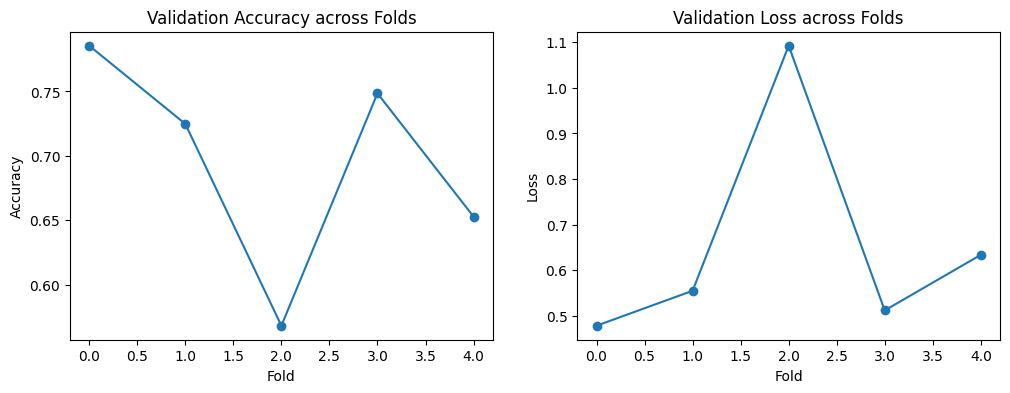

In [ ]:
''' tests
# Process results
accuracies = [r[0] for r in results]
losses = [r[1] for r in results]

# Calculate average metrics
avg_accuracy = np.mean(accuracies)
avg_loss = np.mean(losses)

print(f"Average Validation Accuracy across folds: {avg_accuracy:.4f}")
print(f"Average Validation Loss across folds: {avg_loss:.4f}")

# --- Optional: Visualize Results ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracies, marker='o')
plt.title('Validation Accuracy across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(losses, marker='o')
plt.title('Validation Loss across Folds')
plt.xlabel('Fold')
plt.ylabel('Loss')

plt.show()
'''

In [ ]:
# Define the CNN model
model = Sequential()
# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax')) # Output layer with 2 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 50
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/50
61/61 [==============================] - 15s 216ms/step - loss: 0.6862 - accuracy: 0.5712 - val_loss: 0.6347 - val_accuracy: 0.6603
Epoch 2/50
61/61 [==============================] - 13s 220ms/step - loss: 0.6163 - accuracy: 0.6665 - val_loss: 0.5638 - val_accuracy: 0.7044
Epoch 3/50
61/61 [==============================] - 13s 219ms/step - loss: 0.5548 - accuracy: 0.7304 - val_loss: 0.5043 - val_accuracy: 0.7456
Epoch 4/50
61/61 [==============================] - 13s 220ms/step - loss: 0.4929 - accuracy: 0.7818 - val_loss: 0.3730 - val_accuracy: 0.8430
Epoch 5/50
61/61 [==============================] - 13s 215ms/step - loss: 0.4310 - accuracy: 0.7987 - val_loss: 0.4561 - val_accuracy: 0.7910
Epoch 6/50
61/61 [==============================] - 13s 211ms/step - loss: 0.3665 - accuracy: 0.8458 - val_loss: 0.4115 - val_accuracy: 0.8076
Epoch 7/50
61/61 [==============================] - 13s 219ms/step - loss: 0.3434 - accuracy: 0.8559 - val_loss: 0.2981 - val_accuracy: 0.8712

61/61 [==============================] - 5s 84ms/step - loss: 0.0256 - accuracy: 0.9915
Test Loss: 0.025640826672315598
Test Accuracy: 0.9915471076965332


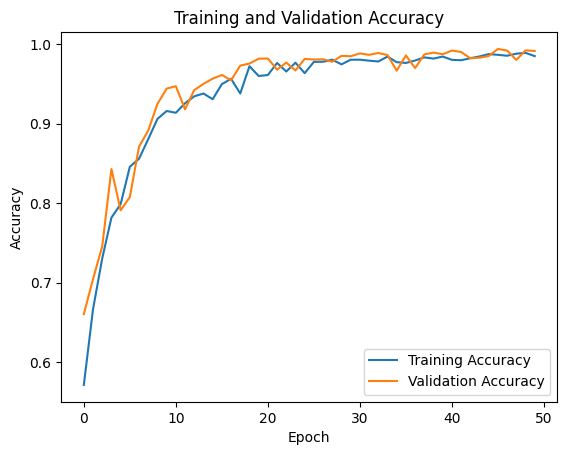

62/62 [==============================] - 5s 85ms/step


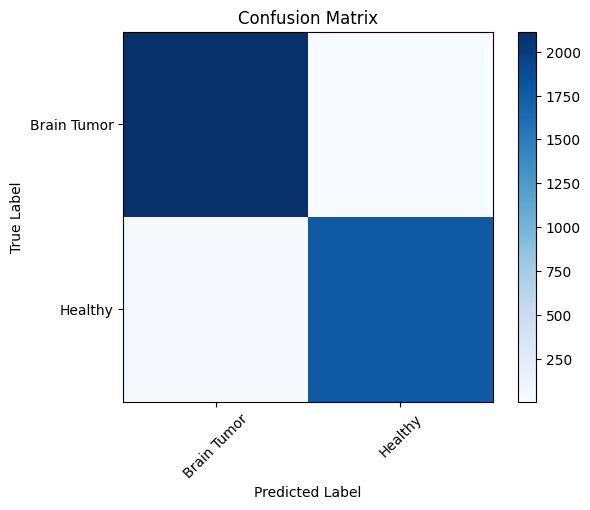

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2120
           1       1.00      0.99      0.99      1800

    accuracy                           0.99      3920
   macro avg       0.99      0.99      0.99      3920
weighted avg       0.99      0.99      0.99      3920



In [ ]:

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot confusion matrix
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = validation_generator.classes
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(train_generator.class_indices))
plt.xticks(tick_marks, train_generator.class_indices, rotation=45)
plt.yticks(tick_marks, train_generator.class_indices)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))

In [ ]:
# Save the trained model
model.save('brain_tumor_detection_model.h5')

# Load the saved model
loaded_model = tf.keras.models.load_model('brain_tumor_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def predict_tumor(image_path):
  img = load_img(image_path, target_size=(img_width, img_height))
  x = img_to_array(img)
  x = x / 255.0  # Normalize image
  x = np.expand_dims(x, axis=0)

  prediction = loaded_model.predict(x)
  class_index = np.argmax(prediction[0])

  if class_index == 1:
    return "Healthy"
  else:
    return "Cancer"

In [127]:
# Random image selection from a folder
def select_random_image(folder_path):
  image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  random_image = random.choice(image_files)
  return os.path.join(folder_path, random_image)

# Get a random image from a folder
folder_path = '/content/prediction_data/Prediction Data Set' # Klasör yolunu belirtin

# Predict and print the result
count = 0
# Dosya adından gerçek sonucu belirleme
for i in range(100):
  image_path = select_random_image(folder_path)
  prediction = predict_tumor(image_path)

  real_result = "Healthy" if "Not Cancer" in image_path else "Cancer"

  print(f"Dosya Yolu: {image_path}")
  print(f"Gerçek Sonuç: {real_result}")
  print(f"Model Tahmini: {prediction}")
  if(real_result == prediction):
    count+=1
print(f"Doğru Sayısı: {count}/100 tahmin sayısı")

1/1 [==============================] - 0s 20ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (905).jpg
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 17ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (42).tif
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 19ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (1799).jpg
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 18ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (1).tif
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 17ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (2).jpg
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 17ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Not Cancer  (34).jpg
Gerçek Sonuç: Healthy
Model T

In [ ]:
# Tümörün yerini görselleştirmek için Grad-CAM kullanma
from tensorflow.keras.models import Model
import cv2

def grad_cam(image_path, model, layer_name):
    img = load_img(image_path, target_size=(img_width, img_height))
    # PIL görüntüsünü NumPy dizisine dönüştürme
    img = np.array(img)

    x = img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)

    # Model çıkışını ve son konvolüsyon katmanı çıkışını alma
    grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(x)
        loss = predictions[:, np.argmax(predictions[0])]
    grads = tape.gradient(loss, conv_outputs)

    # Ortalama gradyanları hesaplama
    cast_conv_outputs = tf.cast(conv_outputs > 0, "float32")
    cast_grads = tf.cast(grads > 0, "float32")
    guided_grads = cast_grads * cast_conv_outputs * grads
    conv_outputs = conv_outputs[0]
    guided_grads = guided_grads[0]
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)

    # Isı haritasını oluşturma
    cam = cv2.resize(cam.numpy(), (img_width, img_height))
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    # Isı haritasını tersine çevirme
    heatmap = cv2.bitwise_not(heatmap)
    # output_image oluşturmadan önce img'yi RGB'den BGR'ye dönüştürme
    output_image = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), 0.6, heatmap, 0.4, 0)

    return output_image

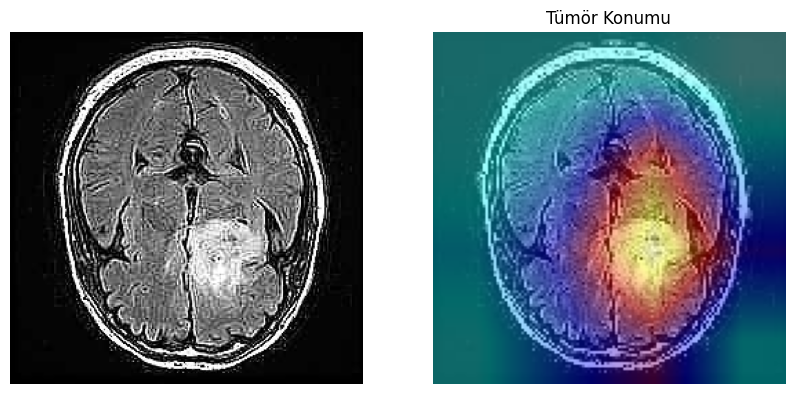

In [ ]:
# Rastgele bir görüntü seçme
image_path = select_random_image('/content/train_data/Training Data Set/Brain Tumor')

# Grad-CAM ile ısı haritasını oluşturma
layer_name = "conv2d_165" #konvolüsyon katmanı girin
heatmap_image = grad_cam(image_path, loaded_model, layer_name)

# Sonuçları ve ısı haritasını görüntüleme
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(load_img(image_path))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(heatmap_image)
plt.title("Tümör Konumu")
plt.axis("off")

plt.show()

In [ ]:
# Önceden eğitilmiş VGG16 modelini yükleme (sınıflandırma katmanlarını dahil etme)
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_width, img_height, 3)))

# VGG16'daki katmanların çoğunu dondurma
for layer in base_model.layers:
    layer.trainable = False

# Kodlayıcı (Encoder)
c1 = base_model.get_layer("block1_conv2").output
p1 = MaxPooling2D((2, 2))(c1)

c2 = base_model.get_layer("block2_conv2").output
p2 = MaxPooling2D((2, 2))(c2)

c3 = base_model.get_layer("block3_conv3").output
p3 = MaxPooling2D((2, 2))(c3)

c4 = base_model.get_layer("block4_conv3").output
p4 = MaxPooling2D((2, 2))(c4)

# Kod çözücü (Decoder)
u5 = UpSampling2D((2, 2))(p4)
# Burada c4 ile birleştiriyoruz
concat5 = concatenate([u5, c4])
c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(concat5)

u6 = UpSampling2D((2, 2))(c5)
# Burada c3 ile birleştiriyoruz
concat6 = concatenate([u6, c3])
c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat6)

u7 = UpSampling2D((2, 2))(c6)
# Burada c2 ile birleştiriyoruz
concat7 = concatenate([u7, c2])
c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat7)

u8 = UpSampling2D((2, 2))(c7)
# Burada c1 ile birleştiriyoruz
concat8 = concatenate([u8, c1])
c8 = Conv2D(32, (3, 3), activation='relu', padding='same')(concat8)

# Çıkış katmanı
outputs = Conv2D(1, (1, 1), activation='sigmoid')(c8)

# Modeli oluşturma
vgg_model = Model(inputs=base_model.input, outputs=outputs)

In [ ]:
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Get a random image from a folder
folder_path = '/content/prediction_data/Prediction Data Set' # Klasör yolunu belirtin
loaded_model = vgg_model
# Predict and print the result
count = 0
# Dosya adından gerçek sonucu belirleme
for i in range(100):
  image_path = select_random_image(folder_path)
  prediction = predict_tumor(image_path)

  real_result = "Healthy" if "Not Cancer" in image_path else "Cancer"

  print(f"Dosya Yolu: {image_path}")
  print(f"Gerçek Sonuç: {real_result}")
  print(f"Model Tahmini: {prediction}")
  if(real_result == prediction):
    count+=1
print(f"Doğru Sayısı: {count}/100 tahmin sayısı")

1/1 [==============================] - 0s 165ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Not Cancer  (38).jpg
Gerçek Sonuç: Healthy
Model Tahmini: Cancer
1/1 [==============================] - 0s 17ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (7).tif
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 16ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Not Cancer  (1639).jpg
Gerçek Sonuç: Healthy
Model Tahmini: Cancer
1/1 [==============================] - 0s 19ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Not Cancer  (1689).jpg
Gerçek Sonuç: Healthy
Model Tahmini: Cancer
1/1 [==============================] - 0s 18ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (2343).jpg
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 17ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Not Cancer  (709).jpg
Gerçe